In [ ]:
#I will probably have to combine:
    #an ARIMA timeseries model
    #a linear regression model which takes into account time of day, weekend, eve of weekend, temperature and rain

In [17]:
#regression model

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [8]:
bicing_for_model = pd.read_csv("data/bicing_final.csv")

In [12]:
dummy_columns = ['is_weekend_or_bank_holiday', 'is_eve_of_weekend_or_bank_holiday', 'time_of_day']

In [15]:
bicing_for_model_dummies = pd.get_dummies(bicing_for_model, columns=dummy_columns, drop_first=False, dtype=int)

In [18]:
bicing_for_model_dummies.sample(1)

,Unnamed: 0,bikesInUsage,electricalBikesInUsage,mechanicalBikesInUsage,dateTime,temperature,precipitation,is_weekend_or_bank_holiday_False,is_weekend_or_bank_holiday_True,is_eve_of_weekend_or_bank_holiday_False,is_eve_of_weekend_or_bank_holiday_True,time_of_day_Afternoon,time_of_day_Evening,time_of_day_Morning,time_of_day_Night
16472,16472,336,3,333,2018-11-26 13:15:04,13.54,0.0,1,0,1,0,1,0,0,0


In [25]:
corr_bicing = bicing_for_model_dummies[["bikesInUsage", "temperature", "precipitation", "is_weekend_or_bank_holiday_True", "is_eve_of_weekend_or_bank_holiday_True", "time_of_day_Morning", "time_of_day_Afternoon", "time_of_day_Evening", "time_of_day_Night"]].corr()

In [21]:
corr_bicing

,bikesInUsage,temperature,precipitation,is_weekend_or_bank_holiday_True,is_eve_of_weekend_or_bank_holiday_True,time_of_day_Morning,time_of_day_Afternoon,time_of_day_Evening,time_of_day_Night
bikesInUsage,1.000000,0.256415,-0.110473,-0.259573,-0.085190,-0.003293,0.311094,0.251980,-0.561824
temperature,0.256415,1.000000,0.039677,-0.038123,-0.035909,0.001498,0.296614,-0.097233,-0.202059
precipitation,-0.110473,0.039677,1.000000,0.009417,0.054220,-0.005240,0.005699,-0.029832,0.029414
is_weekend_or_bank_holiday_True,-0.259573,-0.038123,0.009417,1.000000,0.183119,-0.000351,-0.002992,0.000669,0.002687
is_eve_of_weekend_or_bank_holiday_True,-0.085190,-0.035909,0.054220,0.183119,1.000000,0.002113,-0.003011,-0.003501,0.004416
time_of_day_Morning,-0.003293,0.001498,-0.005240,-0.000351,0.002113,1.000000,-0.334771,-0.333368,-0.331725
time_of_day_Afternoon,0.311094,0.296614,0.005699,-0.002992,-0.003011,-0.334771,1.000000,-0.334943,-0.333292
time_of_day_Evening,0.251980,-0.097233,-0.029832,0.000669,-0.003501,-0.333368,-0.334943,1.000000,-0.331895
time_of_day_Night,-0.561824,-0.202059,0.029414,0.002687,0.004416,-0.331725,-0.333292,-0.331895,1.000000


In [22]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

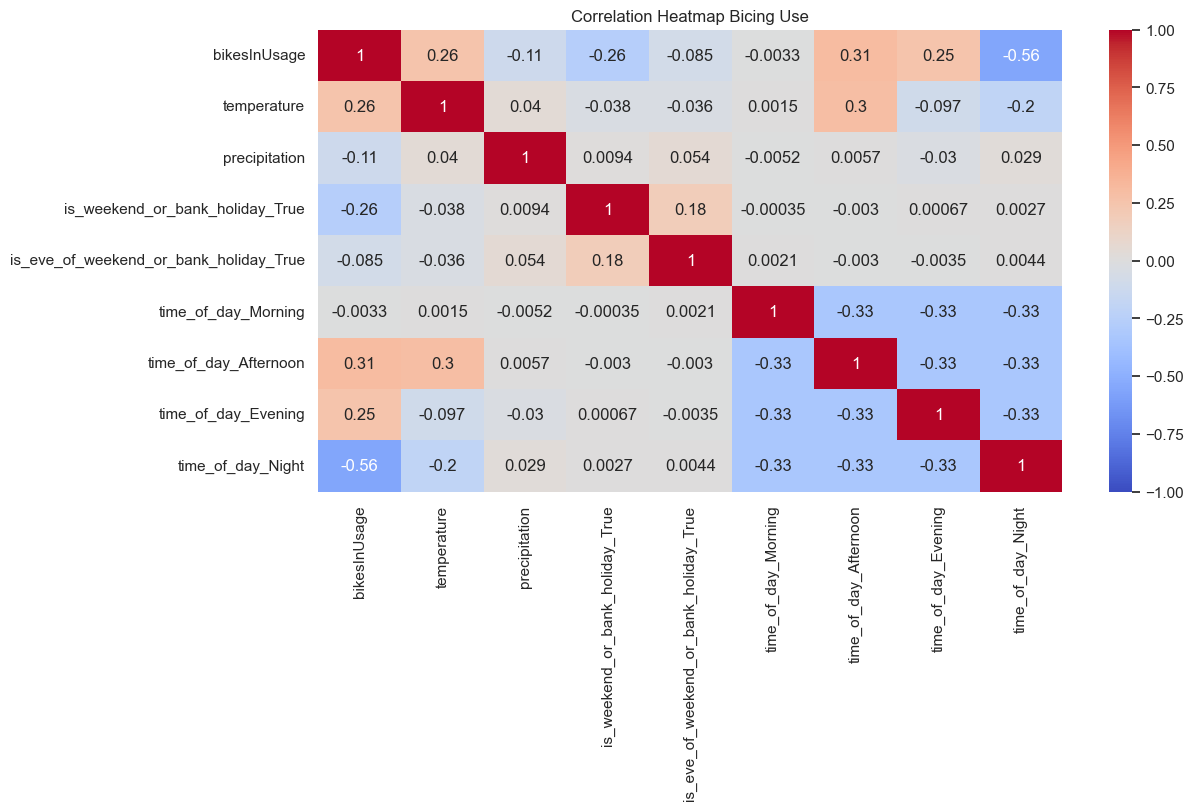

In [23]:
sns.heatmap(corr_bicing, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap Bicing Use')
plt.show()